In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from yellowbrick.contrib.classifier import DecisionViz
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from yellowbrick.contrib.classifier import DecisionViz

Mean squared error: 23.038464147475725


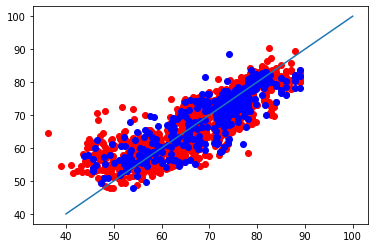

In [12]:
data_loc = 'https://github.com/dknife/ML/raw/main/data/'
life = pd.read_csv(data_loc + 'life_expectancy.csv')

life.head()
life = life[['Life expectancy', 'Alcohol', 'Percentage expenditure',
             'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']]
life.dropna(inplace = True)
X = life[['Alcohol', 'Percentage expenditure', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']

poly_feature = PolynomialFeatures(degree = 3)
X = poly_feature.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_hat_train = lin_model.predict(X_train)
y_hat_test = lin_model.predict(X_test)
plt.scatter(y_train, y_hat_train, color='r')
plt.scatter(y_test, y_hat_test, color='b')
plt.plot([40, 100], [40, 100])
print('Mean squared error:', mean_squared_error(y_test, y_hat_test))

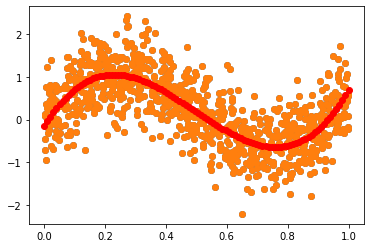

In [22]:
data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc+'nonlinear.csv')

plt.scatter(df['x'], df['y'])
X= df['x'].to_numpy()
y = df['y'].to_numpy()
X = X.reshape(-1, 1)
feature_cubic = PolynomialFeatures(degree = 3)
X_3 = feature_cubic.fit_transform(X)

lin_model = LinearRegression()
domain = np.linspace(0, 1, 100).reshape(-1, 1)

lin_model.fit(X_3, y)
domain_3 = feature_cubic.fit_transform(domain)
predictions = lin_model.predict(domain_3)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, predictions, color='r')

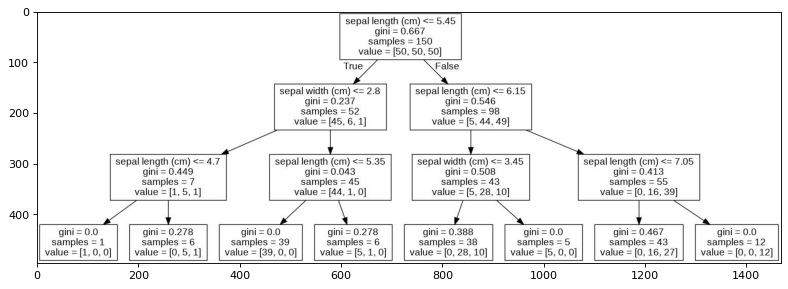

In [26]:
iris = load_iris()

X,y = iris.data[:,:2], iris.target
dec_tree = DecisionTreeClassifier(max_depth=3)
dec_tree.fit(X, y)

export_graphviz (
    dec_tree,
    out_file=("./dec_tree_for_iris.dot"),
    feature_names=iris.feature_names[:2],
)

!dot -Tjpg dec_tree_for_iris.dot -o dec_tree_for_iris.jpg

dec_tree_img = plt.imread('./dec_tree_for_iris.jpg')
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)

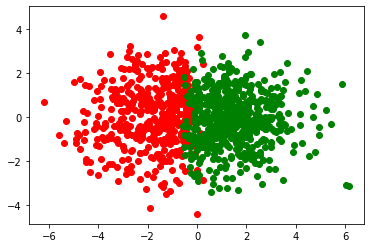

In [30]:
data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc+'two_classes.csv')

df_positive = df[df['y'] >0]
df_negative = df[df['y'] ==0]
plt.scatter(df_positive['x1'], df_positive['x2'], color='r')
plt.scatter(df_negative['x1'], df_negative['x2'], color='g')

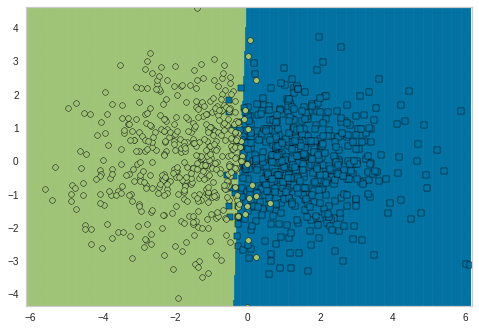

In [34]:
X = df[['x1', 'x2']].to_numpy()
y = df['y']
svm_simple = LinearSVC(C=1, loss='hinge')
svm_simple.fit(X, y)

viz = DecisionViz(svm_simple, title="linear SVM")
viz.fit(X, y)
viz.draw(X, y)

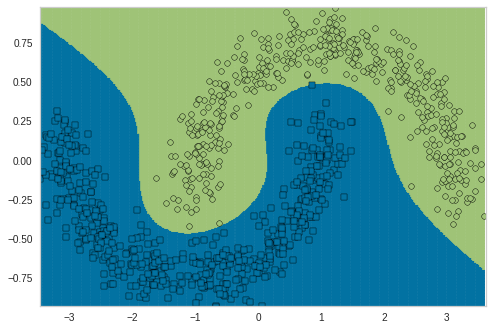

In [42]:
data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc+'twisted_data.csv')

X = df[['x1', 'x2']].to_numpy()
y = df['y']

polynomial_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(C=10, kernel = 'poly', degree = 4, coef0=2))
])
polynomial_svm_clf.fit(X, y)
viz = DecisionViz(polynomial_svm_clf, title="polynomial feature SVM")
viz.fit(X, y)
viz.draw(X, y)

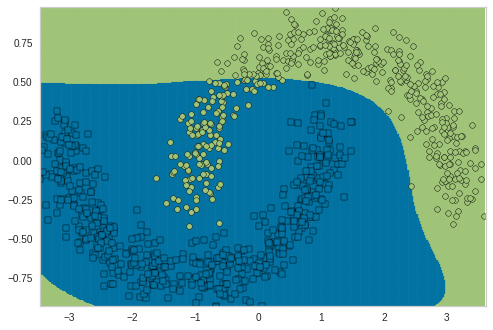

In [43]:
polynomial_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(C=1, kernel = 'poly', degree = 6, coef0=0.01))
])
polynomial_svm_clf.fit(X, y)
viz = DecisionViz(polynomial_svm_clf, title="polynomial feature SVM")
viz.fit(X, y)
viz.draw(X, y)